In [1]:
# !pip install smartboiler==0.0.2.10.2.9.12
from data_handler import DataHandler
from forecast import Forecast
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




Importing /Users/adamgrunwald/Desktop/FIT/smart_boiler/smartboiler/src/smartboiler/data_handler.py


/Users/adamgrunwald/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Importing /Users/adamgrunwald/Desktop/FIT/smart_boiler/smartboiler/src/smartboiler/forecast.py
Importing /Users/adamgrunwald/Library/Python/3.9/lib/python/site-packages/smartboiler/__init__.py
Importing /Users/adamgrunwald/Library/Python/3.9/lib/python/site-packages/smartboiler/data_handler.py


In [2]:
def get_data_for_training_model_zuka():
    dataHandler = DataHandler(
    influx_id="localhost",
    db_name="smart_home_zukalovi",
    db_username="root",
    db_password="root",
    relay_entity_id="shelly1pm_84cca8b07eae",
    relay_power_entity_id="shelly1pm_84cca8b07eae_power",
    tmp_boiler_case_entity_id="esphome_web_c771e8_tmp3",
    tmp_output_water_entity_id="esphome_web_c771e8_ntc_temperature_b_constant_2",
    start_of_data=datetime(2023, 10, 1, 0, 0, 0, 0))


    train_zuka = dataHandler.get_data_for_training_model(left_time_interval=datetime(2023, 10, 1, 0, 0, 0, 0), right_time_interval=datetime(2024, 3, 10, 0, 0, 0),         predicted_column="longtime_mean",
    )
    # save as pkl
    import pickle
    with open('train_zuka_data.pkl', 'wb') as f:
        pickle.dump(train_zuka, f)

In [3]:
def get_data_for_training_model_form():
    dataHandlerForm = DataHandler(influx_id="localhost",
    db_name="smart_home_formankovi",
    db_username="root",
    db_password="root",
    relay_entity_id="shelly1pm_34945475a969",
    relay_power_entity_id="shelly1pm_84cca8b07eae_power",
    tmp_boiler_case_entity_id="shelly1pm_34945475a969_temperature_2",
    tmp_output_water_entity_id="esphome_boiler_temps_ntc_temperature_b_constant",
    start_of_data=datetime(2023, 11, 1, 0, 0, 0, 0))
    train_form = dataHandlerForm.get_data_for_training_model(left_time_interval=datetime(2023, 11, 1, 0, 0, 0, 0), right_time_interval=datetime(2024, 3, 10, 0, 0, 0, 0))
    # save as pkl
    import pickle
    with open('train_form_data.pkl', 'wb') as f:
        pickle.dump(train_form, f)

In [4]:
# get_data_for_training_model_form()
# get_data_for_training_model_zuka()

In [5]:
import pickle
with open('train_form_data.pkl', 'rb') as f:
    train_form = pickle.load(f)
    train_form = train_form[0]
    print(train_form)
with open('train_zuka_data.pkl', 'rb') as f:
    train_zuka = pickle.load(f)
    train_zuka = train_zuka[0]

      longtime_mean  weekday_sin  weekday_cos  hour_sin  hour_cos  \
0          0.026042     0.974928    -0.222521  0.000000  1.000000   
1          0.026042     0.974928    -0.222521  0.000000  1.000000   
2          0.026042     0.974928    -0.222521  0.258819  0.965926   
3          0.026042     0.974928    -0.222521  0.258819  0.965926   
4          0.026042     0.974928    -0.222521  0.500000  0.866025   
...             ...          ...          ...       ...       ...   
6235       0.026042    -0.974928    -0.222521 -0.707107  0.707107   
6236       0.026042    -0.974928    -0.222521 -0.500000  0.866025   
6237       0.026042    -0.974928    -0.222521 -0.500000  0.866025   
6238       0.026042    -0.974928    -0.222521 -0.258819  0.965926   
6239       0.026042    -0.974928    -0.222521 -0.258819  0.965926   

        minute_sin  minute_cos  
0     0.000000e+00         1.0  
1     5.665539e-16        -1.0  
2     0.000000e+00         1.0  
3     5.665539e-16        -1.0  
4     

<AxesSubplot:>

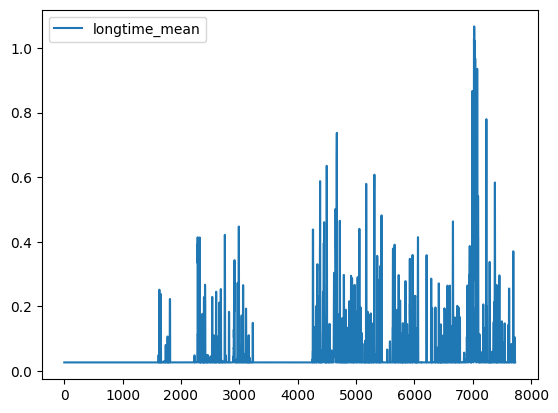

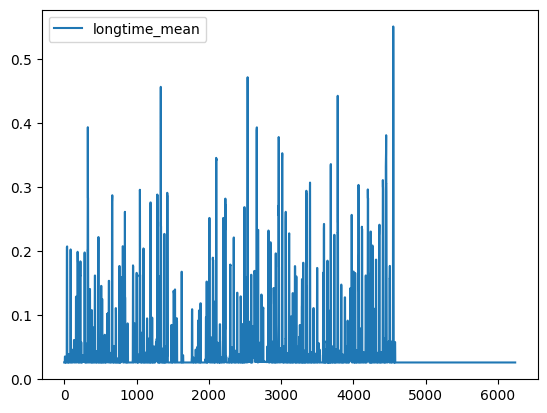

In [6]:
train_zuka.plot(y='longtime_mean')
train_form.plot(y='longtime_mean')

<AxesSubplot:>

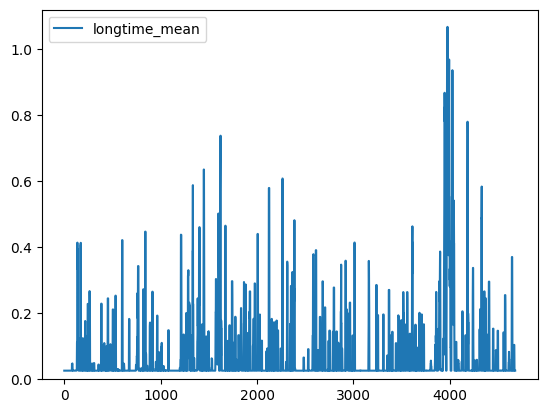

In [7]:
# print gaps in time in train
train_zuka_cut = pd.concat([train_zuka[2150:3300], train_zuka[4200:]])
train_zuka_cut = train_zuka_cut.reset_index(drop=True)
train_zuka_cut.plot(y='longtime_mean', kind='line', ylim=0)
# train_zuka_cut = train_zuk
# train_zuka_cut = train_zuka_cut.reset_index(drop=True)

# train_zuka_cut.plot(y='longtime_mean', k÷ind='line', ylim=0)


<AxesSubplot:>

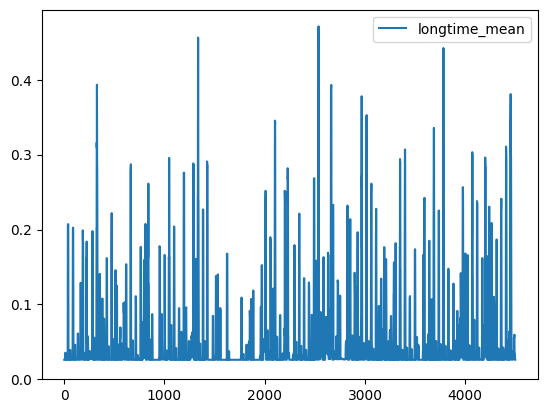

In [8]:

train_form_cut = train_form[0:4500]
train_form_cut.plot(y='longtime_mean', kind='line', ylim=0)

In [6]:

from pytz import utc
import pandas as pd
import numpy as np
from data_handler import DataHandler
from forecast import Forecast
from datetime import datetime, timedelta
start_of_data = datetime(2023, 11, 1)
end_of_data = datetime(2023, 12, 10)
end_of_training_data = datetime(2023, 12, 31, 0, 0, 0)
dataHandler = DataHandler(
    "localhost",
    "smart_home_zukalovi",
    "root",
    "root",
    "shelly1pm_84cca8b07eae",
    "shelly1pm_84cca8b07eae_power",
    "esphome_web_c771e8_tmp3",
    "esphome_web_c771e8_ntc_temperature_b_constant_2",
start_of_data,
)

forecast = Forecast(dataHandler, start_of_data=start_of_data, model_path='lstm_model_zukalovi.keras')
# forecast.load_model(left_time_interval=start_of_data, right_time_interval=end_of_training_data)







In [7]:
forecast.load_model(left_time_interval=datetime(2024, 1, 1, 0, 0, 0, 0), right_time_interval=datetime(2024, 2, 1, 0, 0, 0))

23/23 [==============================] - 0s 811us/step
R2 =  0.6643820976233384
mse =  0.0023702423499297174
rmse =  0.04868513479420302


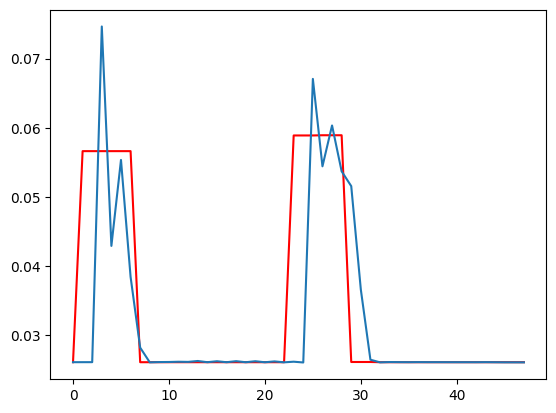

In [8]:
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
df_test,_ = dataHandler.get_data_for_training_model(left_time_interval=datetime(2024, 3, 1, 0, 0, 0, 0), right_time_interval=datetime(2024, 3, 16, 0, 0, 0, 0))
df_test_norm = df_test.copy()


# df_train_norm.loc[:,predicted_column:] = scaler.fit_transform(df_train.loc[:,predicted_column:])
# df_test_norm.loc[:,predicted_column:] = scaler.transform(df_test.loc[:,predicted_column:])
df_test_norm[df_test.columns] = forecast.scaler.transform(df_test)

test_gen = forecast.generator(dataframe = df_test_norm, 
                     target_name = forecast.predicted_column, 
                     lookback = forecast.lookback,
                     delay = forecast.delay,
                     min_index = 0,
                     max_index = None,
                     step = 1,
                     shuffle = False,
                     batch_size = df_test.shape[0])
(X, y_truth) = next(test_gen)
y_pred = forecast.model.predict(X)

np.expand_dims(y_truth,axis=1).shape
y_pred = np.concatenate((y_pred,np.zeros((y_pred.shape[0],forecast.num_of_features))),axis=1)
y_pred = forecast.scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

y_truth = np.concatenate((np.expand_dims(y_truth,axis=1),np.zeros((y_truth.shape[0],forecast.num_of_features))),axis=1)
y_truth = forecast.scaler.inverse_transform(y_truth)
y_truth = y_truth[:,0]

#plot y_truth and y_pred
plt.plot(y_truth[:48], color = 'red', label = 'Real data')
plt.plot(y_pred[:48])

slope, intercept, r_value, p_value, std_err = stats.linregress(x=y_pred,y=y_truth)
mse = mean_squared_error(y_true=y_truth, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_truth, y_pred=y_pred, squared=False)


print('R2 = ',r_value*r_value)
print('mse = ',mse)
print('rmse = ',rmse)



In [9]:
one_week_prediction = []
number_of_30_minutes = 14*24*2
end_train = datetime(2024,1,1, 0, 0, 0)


start_of_data_loader_for_forecast = end_train
end_of_data_loader_for_forecast = end_train + timedelta(hours=25)

start_of_prediction = end_of_data_loader_for_forecast + timedelta(minutes=30)
end_of_prediction = start_of_prediction + timedelta(days=14)

In [10]:
# iterate over one week by 30 minutes, get the prediction first value and save to variable one_week_prediction


for i in range(0, number_of_30_minutes):
    if i % 100 == 0:
        print(i)
    next_steps = forecast.get_forecast_next_steps(left_time_interval=start_of_data_loader_for_forecast, right_time_interval=end_of_data_loader_for_forecast)
    one_week_prediction.append(next_steps.values)
    start_of_data_loader_for_forecast += timedelta(minutes=30)
    end_of_data_loader_for_forecast += timedelta(minutes=30)
print(start_of_data_loader_for_forecast)
print(end_of_data_loader_for_forecast)

0
100
200
300
400
500
600
2024-01-15 00:00:00
2024-01-16 01:00:00


In [11]:
data_truth = dataHandler.get_data_for_training_model(left_time_interval=start_of_prediction, right_time_interval=end_of_prediction, predicted_column="longtime_mean")

In [12]:
# Flatten the list of lists
flattened_list = [item for sublist in one_week_prediction for item in sublist]
print(len(flattened_list))

# Reshape the flattened list to make it 2D
reshaped_data = [flattened_list[i:i+12] for i in range(0, len(flattened_list), 12)]

# flatten the values of the reshaped list


8064


In [13]:

for row in reshaped_data:
    for i in range(0, len(row)):
        row[i] = row[i][0]

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(reshaped_data)
print(df.shape)
df['truth'] = data_truth[0]['longtime_mean'].values


(672, 12)


In [16]:
print(df.shape)
print()
df_shift = df.copy()
# shift to the top based on column = 0 no, 1 1, 2 2
for i in range(0, 12):
    df_shift[i] = df_shift[i].shift(i)
    # remove list from value
    

df_shift = df_shift.dropna()



(672, 13)



In [17]:
from turtle import color
import matplotlib.pyplot as plt
import numpy as np

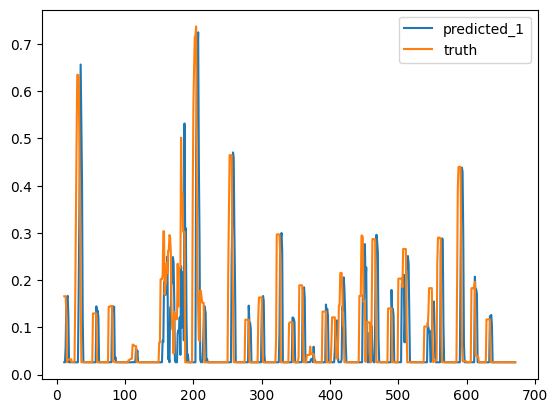

In [18]:
order = 1
plt.plot(df_shift[order][:], label=f'predicted_{order}', )
# i =0
# plt.plot(df_shift[i], label=f'{i}_step_ahead')
plt.plot(df_shift['truth'][:], label='truth')
plt.legend()   
plt.show()

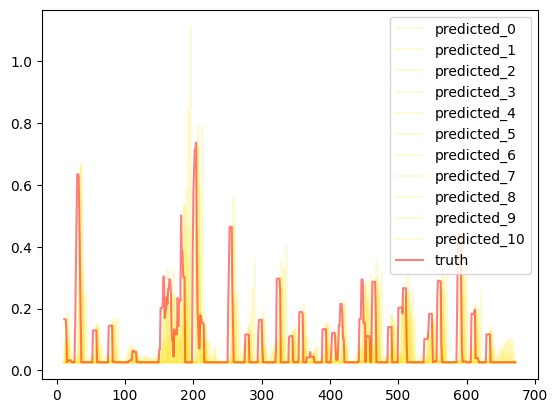

In [19]:

number_of_steps = 11
#create a list of collors from 0 to 12 based on color
colors = plt.cm.viridis(np.linspace(3, 1, number_of_steps))
for i in range(0, number_of_steps):
    #make the plot wider
    plt.plot(df_shift[i][:], label=f'predicted_{i}', color=colors[i], alpha=0.2, )
# i =0
# plt.plot(df_shift[i], label=f'{i}_step_ahead')
plt.plot(df_shift['truth'][:], label='truth', alpha=0.5, color='red')
plt.legend()   
plt.show()

In [20]:
from scipy import stats
dropped_shift = df_shift.dropna()
statistics = {i: {'RMSE': 0, 'MSE': 0, 'MAE': 0, 'r2':0, 'slope':0, 'intercept':0, 'std_err':0, 'integral':0} for i in range(0, 12)}
statistics['truth'] = {'RMSE': 0, 'MSE': 0, 'MAE': 0, 'r2':0, 'slope':0, 'intercept':0, 'std_err':0, 'integral':0}
statistics['truth']['integral'] = np.trapz(dropped_shift['truth'])
for i in range(0, 12):
    #  count rmse, mse, mae with df_shift['true] and df_shift[i]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=dropped_shift[i],y=dropped_shift["truth"])

    statistics[i]['RMSE'] = np.sqrt(np.mean((dropped_shift["truth"] - dropped_shift[i])**2))
    statistics[i]['MSE'] = np.mean((dropped_shift["truth"] - dropped_shift[i])**2)
    statistics[i]['MAE'] = np.mean(np.abs(dropped_shift["truth"] - dropped_shift[i]))
    statistics[i]["r2"] = r_value*r_value
    statistics[i]["integral"] = np.trapz(dropped_shift[i])
    print(r_value**2)
    statistics[i]["slope"] = slope
    statistics[i]["intercept"] = intercept
    statistics[i]["std_err"] = std_err
    

0.045743972523430244
0.045743972523430244
0.0007961956034902798
0.00042375932938481506
1.483920456443121e-05
0.0004106351392229592
1.209404645794191e-05
0.00018176805174163215
0.00045752152356601765
0.0005681494383346298
0.002558345166753423
0.00018635490252100063


In [21]:
left_time_interval = datetime(2024, 1, 1, 0, 0, 0, 0)
right_time_interval = datetime(2024, 1, 2, 0, 0, 0, 0)
data = dataHandler.get_data_for_prediction(left_time_interval=left_time_interval, right_time_interval=right_time_interval)


In [22]:
# df_predict_norm = data.copy()
# df_predict_norm[data.columns] = forecast.scaler.transform(data)
# print(df_predict_norm.tail(10
#                            ))
# print(df_predict_norm.shape)
# predict_gen = forecast.generator(
#     dataframe=df_predict_norm,
#     target_name=forecast.predicted_column,
#     lookback=forecast.lookback,
#     delay=forecast.delay,
#     min_index=0,
#     max_index=None,
#     step=1,
#     shuffle=False,
#     batch_size=df_predict_norm.shape[0],
#             )
# (X, y_truth) = next(predict_gen)

# print(y_truth)
# print(len(y_truth))

In [23]:
# plot integral of all columns
import matplotlib.pyplot as plt
import numpy as np

for key, value in statistics.items():
    print(key, value['integral'])

0 44.74619798398129
1 44.74619798398129
2 44.31335061523792
3 25.92809826190121
4 29.178328316927033
5 21.613784824116316
6 17.595097001072844
7 29.60786378861244
8 18.60069637773781
9 17.44971398423148
10 29.631010677311767
11 18.722237969935797
truth 58.91016795732393


<AxesSubplot:>

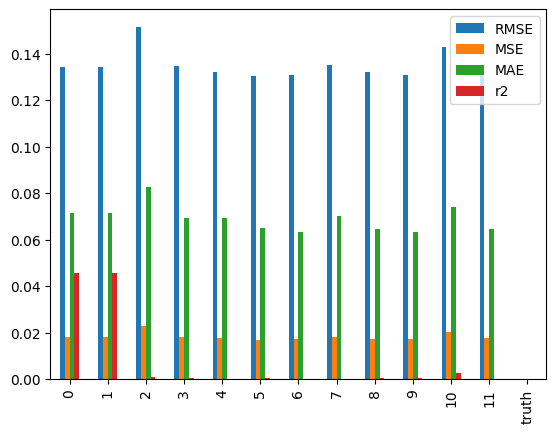

In [24]:
# plot stats
stats_df = pd.DataFrame(statistics)
stats_df = stats_df.T
stats_df.plot(kind='bar', y=['RMSE', 'MSE', 'MAE', 'r2'])

In [25]:
data_truth_longtime_mean = data_truth[0]['longtime_mean']

In [26]:
from operator import le
import pandas as pd
import numpy as np

forecast_begin_date = datetime(2024, 1, 4, 6, 0, 0)
queries = dataHandler.get_database_queries(
    left_time_interval=forecast_begin_date - timedelta(hours=12),
    right_time_interval=forecast_begin_date,
)
df_all = dataHandler.get_df_from_queries(queries)
df_all = dataHandler.process_kWh_water_consumption(df_all)
df_all.index = df_all.index.tz_localize(None)
df_all, _ = dataHandler.transform_data_for_ml(df_all, predicted_column="longtime_mean")
df_test = df_all.copy()
df_test = df_test[-12:]
df_all = df_all[:-12]
df_all_copy = df_all.copy()
forecast_future = pd.DataFrame()

current_forecast_begin_date = forecast_begin_date
current_forecast_end_date = forecast_begin_date + timedelta(minutes=30)
for i in range(0, 6):
    print("-----")

    df_predict = pd.DataFrame(
        {
            "datetime": pd.date_range(
                current_forecast_begin_date, current_forecast_end_date, freq="30min"
            )
        }
    )
    df_predict["longtime_mean"] = 0
    df_predict["weekday_sin"] = np.sin(
        2 * np.pi * df_predict["datetime"].dt.weekday / 7
    )
    df_predict["weekday_cos"] = np.cos(
        2 * np.pi * df_predict["datetime"].dt.weekday / 7
    )
    df_predict["hour_sin"] = np.sin(2 * np.pi * df_predict["datetime"].dt.hour / 24)
    df_predict["hour_cos"] = np.cos(2 * np.pi * df_predict["datetime"].dt.hour / 24)
    df_predict["minute_sin"] = np.sin(2 * np.pi * df_predict["datetime"].dt.minute / 60)
    df_predict["minute_cos"] = np.cos(2 * np.pi * df_predict["datetime"].dt.minute / 60)
    # delete column datetime
    df_predict = df_predict.drop(columns="datetime")
    len_df_predict = df_predict.shape[0]

    # concar df_all and df_predict

    df_all = pd.concat([df_all, df_predict], axis=0)
    df_all = df_all.reset_index(drop=True)

    df_predict_norm = df_all.copy()
    df_predict_norm[df_all.columns] = forecast.scaler.transform(df_all)
    # create predict df with values

    predict_gen = forecast.generator(
        dataframe=df_predict_norm,
        target_name=forecast.predicted_column,
        lookback=forecast.lookback,
        delay=forecast.delay,
        min_index=0,
        max_index=None,
        step=1,
        shuffle=False,
        batch_size=df_predict.shape[0],
    )

    (X, y_truth) = next(predict_gen)

    y_pred = forecast.model.predict(X)

    # np.expand_dims(y_truth,axis=1).shape
    y_pred_inv = np.concatenate(
        (y_pred, np.zeros((y_pred.shape[0], forecast.num_of_features))), axis=1
    )
    y_pred_inv = forecast.scaler.inverse_transform(y_pred_inv)
    y_pred_inv = y_pred_inv[:, 0]
    # set df_all last len_df_predict values to y_pred_inv
    df_all.iloc[-len_df_predict:, df_all.columns.get_loc("longtime_mean")] = y_pred_inv
    # plt.plot(df_all.iloc[-len_df_predict:, df_all.columns.get_loc('longtime_mean')], color = 'green', label = 'Predicted data')
    df_all = df_all[len_df_predict:]
    forecast_future = pd.concat([forecast_future, df_all[-len_df_predict:]], axis=0)
    forecast_future = forecast_future.reset_index(drop=True)

    current_forecast_begin_date = current_forecast_begin_date + timedelta(hours=1)
    current_forecast_end_date = current_forecast_end_date + timedelta(hours=1)


-----
1/1 [==============================] - 0s 10ms/step
-----
1/1 [==============================] - 0s 9ms/step
-----
1/1 [==============================] - 0s 10ms/step
-----
1/1 [==============================] - 0s 9ms/step
-----
1/1 [==============================] - 0s 9ms/step
-----
1/1 [==============================] - 0s 9ms/step


<AxesSubplot:>

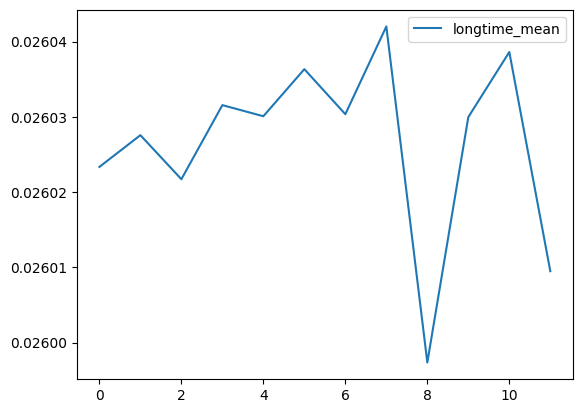

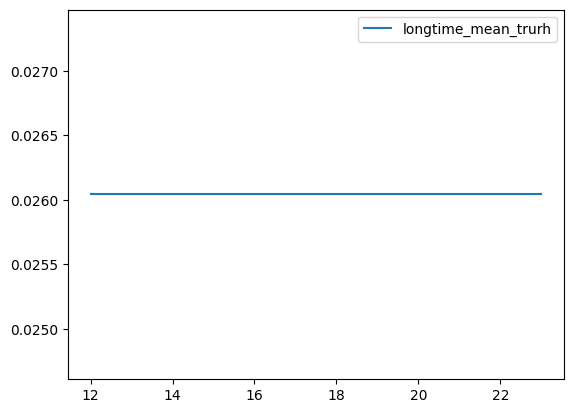

In [27]:
forecast_future.plot(y='longtime_mean', label='longtime_mean')
df_test.plot(y='longtime_mean', label='longtime_mean_trurh')

In [28]:
print(forecast_future['longtime_mean'])

0     0.026023
1     0.026028
2     0.026022
3     0.026032
4     0.026030
5     0.026036
6     0.026030
7     0.026042
8     0.025997
9     0.026030
10    0.026039
11    0.026009
Name: longtime_mean, dtype: float64


In [29]:
# plt.plot(forecast_future['consumed_heat_kWh'], label="Predicted")

begin = datetime(2024, 1, 1, 0, 0, 0) 
end = datetime(2024, 1, 1, 23, 59, 59)

queries = dataHandler.get_database_queries(left_time_interval=begin - timedelta(days=1), right_time_interval=begin)
df_all = dataHandler.get_df_from_queries(queries)
df_all = dataHandler.process_kWh_water_consumption(df_all)

In [30]:

df_all, _= dataHandler.transform_data_for_ml(df_all, predicted_column='longtime_mean')



In [31]:
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

df_predict_norm = df_all.copy()
df_predict_norm[df_predict_norm.columns] = forecast.scaler.transform(df_all)
# create predict df with values 

predict_gen = forecast.generator(dataframe = df_predict_norm, 
        target_name = forecast.predicted_column, 
        lookback = forecast.lookback,
        delay = forecast.delay,
        min_index = 0,
        max_index = None,
        step = 1,
        shuffle = False,
        batch_size = df_predict_norm.shape[0])

(X, y_truth) = next(predict_gen)

y_pred = forecast.model.predict(X)

# np.expand_dims(y_truth,axis=1).shape
y_pred_inv = np.concatenate((y_pred,np.zeros((y_pred.shape[0],forecast.num_of_features))),axis=1)
y_pred_inv = forecast.scaler.inverse_transform(y_pred_inv)
y_pred_inv = y_pred_inv[:,0]

y_truth_inv = np.concatenate((np.expand_dims(y_truth,axis=1),np.zeros((y_truth.shape[0],forecast.num_of_features))),axis=1)
y_truth_inv = forecast.scaler.inverse_transform(y_truth_inv)
y_truth_inv = y_truth_inv[:,0]

statistics = {}
slope, intercept, r_value, p_value, std_err = stats.linregress(x=y_pred_inv,y=y_truth_inv)
mse = mean_squared_error(y_true=y_truth_inv, y_pred=y_pred_inv, squared=True)
rmse = mean_squared_error(y_true=y_truth_inv, y_pred=y_pred_inv, squared=False)

statistics['slope'] = slope
statistics['intercept'] = intercept
statistics['r_value'] = r_value
statistics['p_value'] = p_value
statistics['std_err'] = std_err
statistics['mse'] = mse
statistics['rmse'] = rmse




2/2 [==============================] - 0s 1ms/step


In [32]:
print(statistics)

{'slope': 1.1327393021038603, 'intercept': 0.026827331282686745, 'r_value': 0.8472026746771599, 'p_value': 5.482834348081461e-12, 'std_err': 0.11523011709059605, 'mse': 0.008465193554016856, 'rmse': 0.09200648647794815}


In [33]:
import matplotlib.pyplot as plt
df = pd.concat(df_all_list, axis=1)
df = df[['water_flow_L_per_hour_mean', 'water_temperature_mean', 'boiler_wattage_mean']]
df['water_flow_L_per_hour_mean'] = df['water_flow_L_per_hour_mean']

df = df.resample('1min').mean()
df[f"consumed_heat_kJ"] = (
            df[f"water_flow_L_per_hour_mean"]
            * (df[f"water_temperature_mean"] - 10)
            * 4.186
            * 0.5
            
            
        )
df['boiler_wattage_kWh'] = df['boiler_wattage_mean'] / (1000*60)
df = df.groupby(pd.Grouper(freq='7D'))
df = df.agg({'consumed_heat_kJ': 'sum', 'water_flow_L_per_hour_mean': 'mean', 'water_temperature_mean': 'mean', 'boiler_wattage_kWh': 'sum'})
        
# df consumed_heat_kJ to kWh
df[f"consumed_heat_kWh"] = df[f"consumed_heat_kJ"] / (3600)
df[f"consumed_heat_kWh"] += 0.4*7
print(df)

df['heat_loss'] = df['consumed_heat_kWh'] - df['boiler_wattage_kWh']

plt.plot( df['boiler_wattage_kWh'], label="boiler_heat_kWh")
plt.plot( df['consumed_heat_kWh'], label="consumed_heat_kWh")
plt.legend()



NameError: name 'df_all_list' is not defined